Air Nexus 2024 - Temperature predicition analysis of 2025 in Pakistani stations


By Laiba Hameed and Amna Mehboob

Project Goals:

1.What are the major factors that affected our tempereature readings from? and what can we conclude from them? (explain if they have a proportional relationship or an inverse relationship)

2.What is the average temperature (max and min) in each station in Pakistan in the previous years? (Give the station with the most, least temperature as well as the range and temperature of major cities). Also look at the trends season wise for each station.  

3.what is the mean, max, min temperature rise or decrease in general throughout the whole year for 2025 and compare to 2024-2023.

4.Are our findings supported by past research papers and how do they link to global warming?


In [ ]:
import numpy as np # used for handling numbers and mathematical operations
import pandas as pd # used for handling datasets (like tables and spreadsheets)
import matplotlib.pyplot as plt # used for plotting to visualize the data
import seaborn as sns # used for making graphs to visualize the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("pak_temp_edit.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station name              550 non-null    object 
 1   Pressure of station (mb)  550 non-null    float64
 2   Pressure of sea (mb)      550 non-null    float64
 3   Mean temperature          550 non-null    float64
 4   Maximum temperature       550 non-null    float64
 5   Minimum temperature       550 non-null    float64
 6   Vapour pressure           550 non-null    float64
 7   Prepicitation total       550 non-null    float64
 8   Precipitation day         550 non-null    int64  
 9   Month                     550 non-null    object 
 10  Year                      550 non-null    int64  
 11  Station number            550 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 51.7+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station name              550 non-null    object 
 1   Pressure of station (mb)  550 non-null    float64
 2   Pressure of sea (mb)      550 non-null    float64
 3   Mean temperature          550 non-null    float64
 4   Maximum temperature       550 non-null    float64
 5   Minimum temperature       550 non-null    float64
 6   Vapour pressure           550 non-null    float64
 7   Prepicitation total       550 non-null    float64
 8   Precipitation day         550 non-null    int64  
 9   Month                     550 non-null    object 
 10  Year                      550 non-null    int64  
 11  Station number            550 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 51.7+ KB


Working to find the factors that affect temperature: 1. Pressure and 2. Precipitation

In [ ]:
# Strip trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify that the column name has been fixed
print(data.columns)

# Access the desired columns (making sure the names match exactly)
# Changed the column names to match the actual column names in the DataFrame
vap_pressure_data = data[['Mean temperature', 'Vapour pressure']]

vap_pressure_data.head(20)

Index(['Station name', 'Pressure of station (mb)', 'Pressure of sea (mb)',
       'Mean temperature', 'Maximum temperature', 'Minimum temperature',
       'Vapour pressure', 'Prepicitation total', 'Precipitation day', 'Month',
       'Year', 'Station number'],
      dtype='object')


,Mean temperature,Vapour pressure
0,18.9,9.5
1,25.2,21.0
2,19.7,10.6
3,24.8,16.7
4,28.1,23.4
5,26.3,23.9
6,25.8,24.9
7,23.2,9.6
8,28.7,23.9
9,28.0,22.6


In [ ]:
vap_pressure_data=['Mean temperature','Vapour pressure']
vap_pressure_data=data[vap_pressure_data]
vap_pressure_data.head(20)

,Mean temperature,Vapour pressure
0,18.9,9.5
1,25.2,21.0
2,19.7,10.6
3,24.8,16.7
4,28.1,23.4
5,26.3,23.9
6,25.8,24.9
7,23.2,9.6
8,28.7,23.9
9,28.0,22.6


In [ ]:
print("By looking at the table we can conclude that vapour pressure is directly proportional to temperature.")

By looking at the table we can conclude that vapour pressure is directly proportional to temperature.


In [ ]:
# Strip trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify that the column name has been fixed
print(data.columns)

# Access the desired columns (making sure the names match exactly)
# Changed the column names to match the actual column names in the DataFrame
sea_pressure_data = data[['Mean temperature', 'Pressure of sea (mb)']]  # Corrected column name

sea_pressure_data.head(20)

Index(['Station name', 'Pressure of station (mb)', 'Pressure of sea (mb)',
       'Mean temperature', 'Maximum temperature', 'Minimum temperature',
       'Vapour pressure', 'Prepicitation total', 'Precipitation day', 'Month',
       'Year', 'Station number'],
      dtype='object')


,Mean temperature,Pressure of sea (mb)
0,18.9,1511.3
1,25.2,1011.2
2,19.7,1524.3
3,24.8,1011.0
4,28.1,1009.0
5,26.3,1009.4
6,25.8,1009.6
7,23.2,1487.3
8,28.7,1008.8
9,28.0,1009.5


In [ ]:
sea_pressure_data=['Mean temperature','Pressure of sea (mb)']
sea_pressure_data=data[sea_pressure_data]
sea_pressure_data.head(20)

,Mean temperature,Pressure of sea (mb)
0,18.9,1511.3
1,25.2,1011.2
2,19.7,1524.3
3,24.8,1011.0
4,28.1,1009.0
5,26.3,1009.4
6,25.8,1009.6
7,23.2,1487.3
8,28.7,1008.8
9,28.0,1009.5


In [ ]:
print("By looking at the table we can conclude that sea pressure is inversely proportional to temperature.")

By looking at the table we can conclude that sea pressure is inversely proportional to temperature.


In [ ]:
sta_pressure_data=['Mean temperature','Pressure of station (mb)']
sta_pressure_data=data[sta_pressure_data]
sta_pressure_data.head(20)

,Mean temperature,Pressure of station (mb)
0,18.9,854.7
1,25.2,974.1
2,19.7,830.4
3,24.8,954.4
4,28.1,988.3
5,26.3,983.0
6,25.8,980.9
7,23.2,858.1
8,28.7,989.4
9,28.0,985.4


In [ ]:
print("By looking at the table we can conclude that sea pressure is directly proportional to temperature.")

By looking at the table we can conclude that sea pressure is directly proportional to temperature.


In [ ]:
prep_total_pressure_data=['Mean temperature','Prepicitation total']
prep_total_pressure_data=data[prep_total_pressure_data]
prep_total_pressure_data.head(20)

,Mean temperature,Prepicitation total
0,18.9,27.4
1,25.2,43.0
2,19.7,8.5
3,24.8,50.0
4,28.1,1.0
5,26.3,35.0
6,25.8,23.0
7,23.2,4.0
8,28.7,0.0
9,28.0,6.8


In [ ]:
print("By looking at the table we can conclude that relationship between total precipitation and temperature is unclear as in some areas such Rawalpindi have high precipitation but still have higher temperature than those areas with little to no precipitation.")

By looking at the table we can conclude that relationship between total precipitation and temperature is unclear as in some areas such Rawalpindi have high precipitation but still have higher temperature than those areas with little to no precipitation.


Working to find the station trends seasonal and general for 2024-23

In [ ]:
mean_max_temp = data.groupby('Station name')['Maximum temperature'].mean()

In [ ]:
max_mean_temp_record = mean_max_temp.idxmax()
max_mean_temp_value = mean_max_temp.max()

In [ ]:
max_predicted_temp = 30.52
difference = max_mean_temp_value - max_predicted_temp

In [ ]:
print(f"Station with the highest mean maximum temperature: {max_mean_temp_record}")
print(f"Mean maximum temperature: {max_mean_temp_value:.2f} °C")
print(f"Predicted maximum temperature: {max_predicted_temp:.2f} °C")
print(f"Difference between predicted and mean recorded temperature: {difference:.2f} °C")

Station with the highest mean maximum temperature: sh.benazirabad
Mean maximum temperature: 36.28 °C
Predicted maximum temperature: 30.52 °C
Difference between predicted and mean recorded temperature: 5.76 °C


In [ ]:
# Calculate the mean of minimum temperature for each station
mean_min_temp = data.groupby('Station name')['Minimum temperature'].mean()

# Find the station with the lowest mean minimum temperature
min_mean_temp_record = mean_min_temp.idxmin()
min_mean_temp_value = mean_min_temp.min()

# Define the predicted minimum temperature
min_predicted_temp = 18.57

# Calculate the difference
difference = min_mean_temp_value - min_predicted_temp

# Print the results
print(f"Station with the lowest mean minimum temperature: {min_mean_temp_record}")
print(f"Mean minimum temperature: {min_mean_temp_value:.2f} °C")
print(f"Predicted minimum temperature: {min_predicted_temp:.2f} °C")
print(f"Difference between predicted and mean recorded temperature: {difference:.2f} °C")

Station with the lowest mean minimum temperature: Parachinar
Mean minimum temperature: 9.24 °C
Predicted minimum temperature: 18.57 °C
Difference between predicted and mean recorded temperature: -9.33 °C


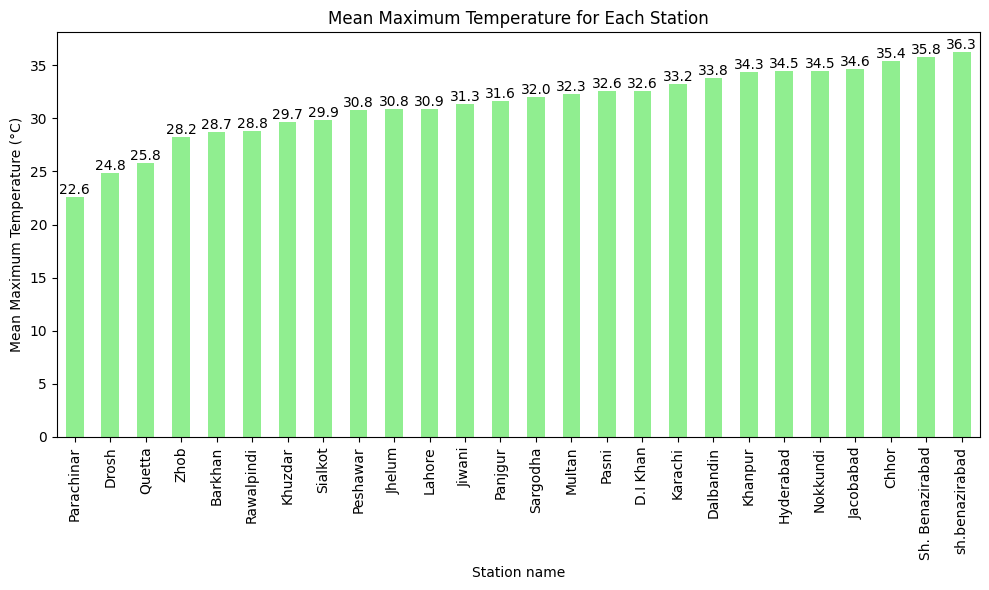

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = "pak_temp_edit.csv"  # Adjust this if the file is in a different location
data = pd.read_csv(data_path)

# Calculate the mean of maximum temperature for each station
mean_max_temp = data.groupby('Station name')['Maximum temperature'].mean()

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = mean_max_temp.sort_values(ascending=True).plot(kind='bar', color='lightgreen')

# Annotate the bars with their values
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Station name')
plt.ylabel('Mean Maximum Temperature (°C)')
plt.title('Mean Maximum Temperature for Each Station')
plt.tight_layout()
plt.show()


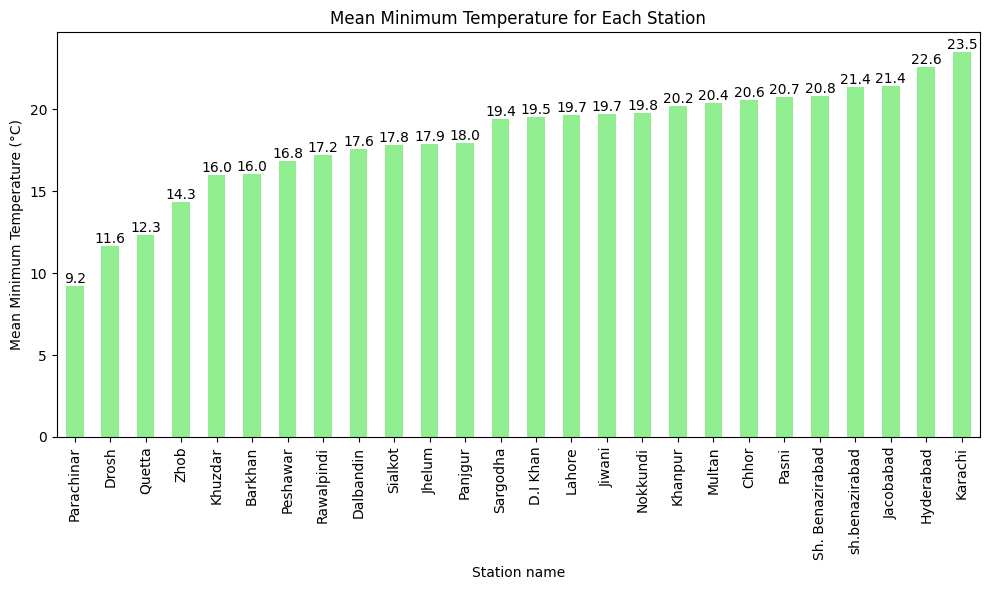

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = "pak_temp_edit.csv"  # Adjust this if the file is in a different location
data = pd.read_csv(data_path)

# Calculate the mean of minimum temperature for each station
mean_min_temp = data.groupby('Station name')['Minimum temperature'].mean()

# Plotting the graph for mean minimum temperature
plt.figure(figsize=(10, 6))
bars = mean_min_temp.sort_values(ascending=True).plot(kind='bar', color='lightgreen')

# Annotate the bars with their values
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Station name')
plt.ylabel('Mean Minimum Temperature (°C)')
plt.title('Mean Minimum Temperature for Each Station')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd # import the pandas library and assign it to the alias 'pd'

data = pd.read_csv("pak_temp_edit_A.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station name              550 non-null    object 
 1   Pressure of station (mb)  550 non-null    float64
 2   Pressure of sea (mb)      550 non-null    float64
 3   Mean temperature          550 non-null    float64
 4   Maximum temperature       550 non-null    float64
 5   Minimum temperature       550 non-null    float64
 6   Vapour pressure           550 non-null    float64
 7   Prepicitation total       550 non-null    float64
 8   Precipitation day         550 non-null    int64  
 9   Month                     550 non-null    int64  
 10  Year                      550 non-null    int64  
 11  Station number            550 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 51.7+ KB


In [ ]:
# Strip trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify that the column name has been fixed
data.columns

Index(['Station name', 'Pressure of station (mb)', 'Pressure of sea (mb)',
       'Mean temperature', 'Maximum temperature', 'Minimum temperature',
       'Vapour pressure', 'Prepicitation total', 'Precipitation day', 'Month',
       'Year', 'Station number'],
      dtype='object')

In [ ]:
# Define a function to assign seasons based on the month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

# Assign seasons to the dataset
data['Season'] = data['Month'].apply(assign_season)

# Perform seasonal analysis: calculate averages for numerical columns grouped by season
seasonal_analysis = data.groupby('Season').mean(numeric_only=True)

# Display the seasonal analysis summary
seasonal_analysis


,Pressure of station (mb),Pressure of sea (mb),Mean temperature,Maximum temperature,Minimum temperature,Vapour pressure,Prepicitation total,Precipitation day,Month,Year,Station number
Season,,,,,,,,,,,
Autumn,951.109600,1165.684000,26.342400,32.728000,19.842400,25.280000,20.048000,1.568000,9.8,2023.4,13.0
Spring,950.680667,1163.885333,24.912667,31.862667,17.926000,14.952667,39.720000,4.220000,4.0,2023.5,13.0
Summer,937.603333,1137.405333,31.402667,37.274667,25.977333,25.224667,77.786667,4.786667,7.0,2023.5,13.0
Winter,959.072000,1176.046400,14.429600,21.524800,7.278400,9.516000,13.032800,1.560000,3.6,2023.4,13.0


In [ ]:
# Define a function to categorize seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Add a 'Season' column
data['Season'] = data['Month'].apply(get_season)


In [ ]:
# Group by station and season, then calculate the mean
seasonal_data = data.groupby(['Station name', 'Season'])['Maximum temperature'].mean().reset_index()

# Pivot the data for better visualization
pivot_data = seasonal_data.pivot(index='Station name', columns='Season', values='Maximum temperature')
print(pivot_data)


Season              Autumn     Spring     Summer     Winter
Station name                                               
Barkhan          29.220000  28.783333  35.250000  20.300000
Chhor            36.460000  38.650000  36.966667  28.500000
D.I Khan         34.440000  33.583333  39.300000  21.460000
Dalbandin        35.100000  32.783333  43.416667  22.000000
Drosh            27.860000  22.133333  35.366667  12.360000
Hyderabad        35.640000  37.300000  37.416667  26.360000
Jacobabad        34.800000  37.600000  41.350000  22.760000
Jhelum           32.300000  32.633333  36.866667  19.960000
Jiwani           32.640000  31.733333  33.933333  26.460000
Karachi          34.660000  34.533333  34.700000  28.420000
Khanpur          36.120000  36.650000  39.883333  23.160000
Khuzdar          31.280000  29.450000  35.883333  20.800000
Lahore           32.240000  33.066667  36.650000  20.140000
Multan           34.180000  34.050000  38.133333  21.220000
Nokkundi         35.800000  33.950000  4

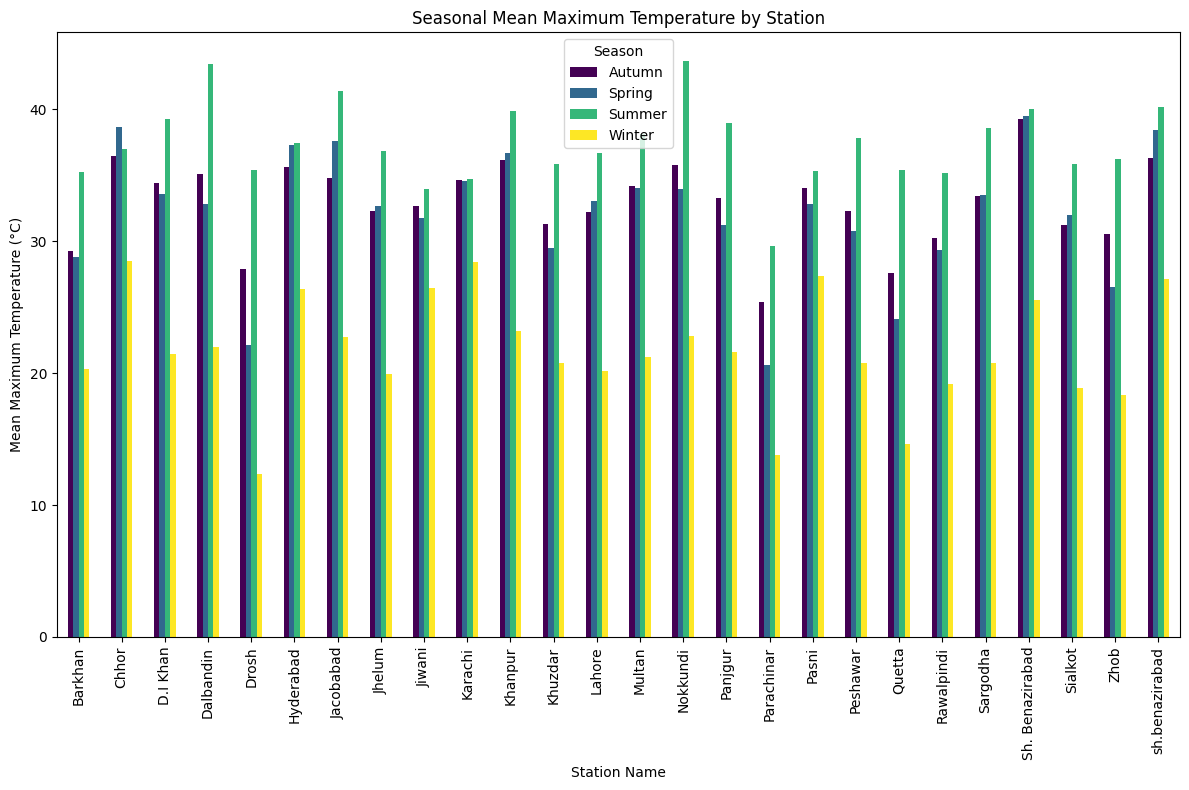

In [ ]:

# Plot a bar chart for each station
pivot_data.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.xlabel('Station Name')
plt.ylabel('Mean Maximum Temperature (°C)')
plt.title('Seasonal Mean Maximum Temperature by Station')
plt.legend(title='Season')
plt.tight_layout()
plt.show()


In [ ]:
# Strip trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify that the column name has been fixed
data.columns

Index(['Station name', 'Pressure of station (mb)', 'Pressure of sea (mb)',
       'Mean temperature', 'Maximum temperature', 'Minimum temperature',
       'Vapour pressure', 'Prepicitation total', 'Precipitation day', 'Month',
       'Year', 'Station number', 'Season'],
      dtype='object')

In [ ]:
# Define a function to assign seasons based on the month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

# Assign seasons to the dataset
data['Season'] = data['Month'].apply(assign_season)

# Perform seasonal analysis: calculate averages for numerical columns grouped by season
seasonal_analysis = data.groupby('Season').mean(numeric_only=True)

# Display the seasonal analysis summary
seasonal_analysis


,Pressure of station (mb),Pressure of sea (mb),Mean temperature,Maximum temperature,Minimum temperature,Vapour pressure,Prepicitation total,Precipitation day,Month,Year,Station number
Season,,,,,,,,,,,
Autumn,951.109600,1165.684000,26.342400,32.728000,19.842400,25.280000,20.048000,1.568000,9.8,2023.4,13.0
Spring,950.680667,1163.885333,24.912667,31.862667,17.926000,14.952667,39.720000,4.220000,4.0,2023.5,13.0
Summer,937.603333,1137.405333,31.402667,37.274667,25.977333,25.224667,77.786667,4.786667,7.0,2023.5,13.0
Winter,959.072000,1176.046400,14.429600,21.524800,7.278400,9.516000,13.032800,1.560000,3.6,2023.4,13.0


In [ ]:
# Define a function to categorize seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Add a 'Season' column
data['Season'] = data['Month'].apply(get_season)


In [ ]:
# Group by 'Station name' and 'Season', then calculate mean
seasonal_min_temp = data.groupby(['Station name', 'Season'])['Minimum temperature'].mean().reset_index()

# Pivot the data for easier visualization
seasonal_pivot = seasonal_min_temp.pivot(index='Station name', columns='Season', values='Minimum temperature')
print(seasonal_pivot)


Season              Autumn     Spring     Summer     Winter
Station name                                               
Barkhan          18.020000  15.850000  23.166667   5.680000
Chhor            22.440000  21.500000  27.050000   9.840000
D.I Khan         21.800000  19.566667  27.416667   7.780000
Dalbandin        18.180000  17.050000  28.500000   4.460000
Drosh            13.340000   9.433333  21.050000   1.280000
Hyderabad        24.460000  23.166667  28.533333  12.740000
Jacobabad        23.400000  21.616667  29.283333   9.900000
Jhelum           20.300000  17.400000  25.900000   6.440000
Jiwani           20.820000  19.650000  24.683333  12.780000
Karachi          25.220000  24.216667  29.150000  14.240000
Khanpur          22.200000  20.350000  28.650000   7.860000
Khuzdar          16.440000  15.883333  23.233333   6.860000
Lahore           21.600000  20.000000  26.850000   8.740000
Multan           23.280000  20.516667  28.150000   8.020000
Nokkundi         20.540000  19.450000  2

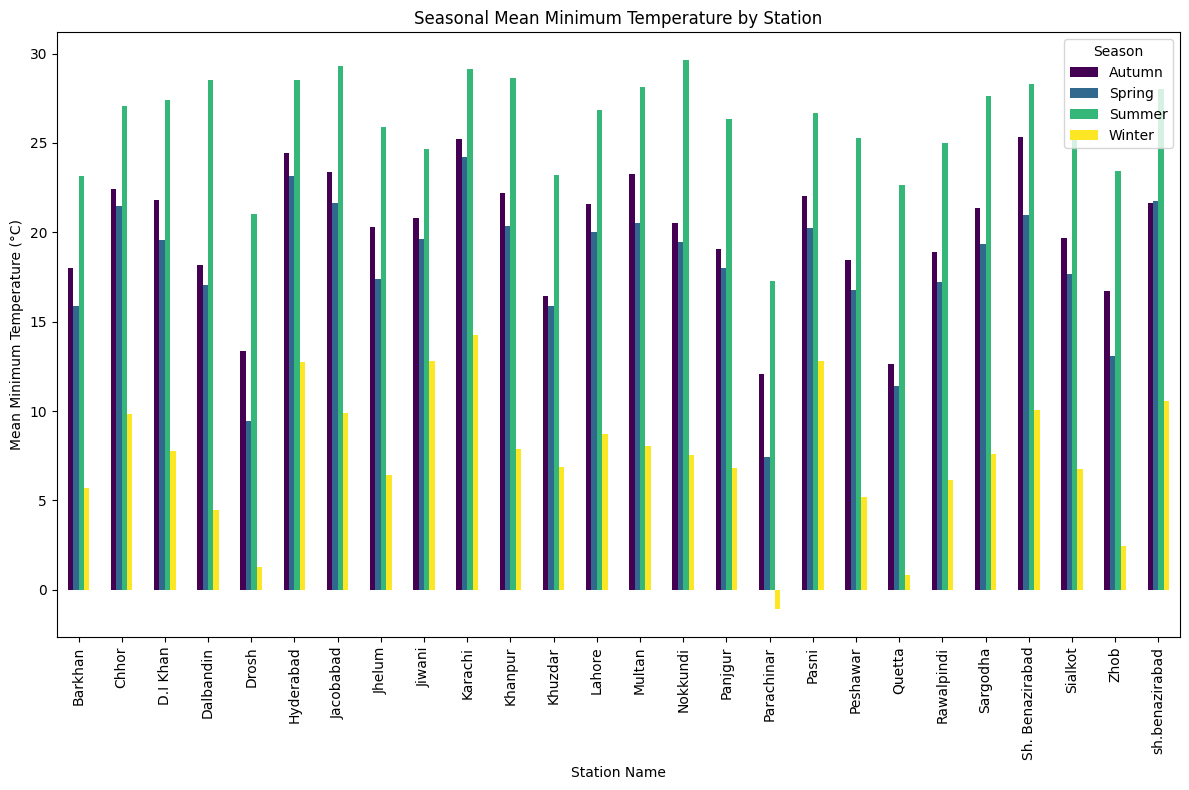

In [ ]:
# Bar chart for seasonal minimum temperatures by station
seasonal_pivot.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.xlabel('Station Name')
plt.ylabel('Mean Minimum Temperature (°C)')
plt.title('Seasonal Mean Minimum Temperature by Station')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

Working to predict 2025's temperature and compare it with the previous years

In [ ]:
print(data.columns)

Index(['Station name', 'Pressure of station (mb)', 'Pressure of sea (mb)',
       'Mean temperature', 'Maximum temperature', 'Minimum temperature',
       'Vapour pressure', 'Prepicitation total', 'Precipitation day', 'Month',
       'Year', 'Station number', 'Season'],
      dtype='object')


In [ ]:
data.columns=data.columns.str.strip() # remove leading/trailing spaces
data.columns=data.columns.str.replace(' ','_') # replace spaces with underscores
data.columns=data.columns.str.lower() # convert lowercase for consistency
print(data.columns)

Index(['station_name', 'pressure_of_station_(mb)', 'pressure_of_sea_(mb)',
       'mean_temperature', 'maximum_temperature', 'minimum_temperature',
       'vapour_pressure', 'prepicitation_total', 'precipitation_day', 'month',
       'year', 'station_number', 'season'],
      dtype='object')


In [ ]:
"""month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}
data['month'] = data['month'].str.strip().replace(month_map)"""

"month_map = {\n    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,\n    'June': 6, 'July': 7, 'August': 8, 'September': 9,\n    'October': 10, 'November': 11, 'December': 12\n}\ndata['month'] = data['month'].str.strip().replace(month_map)"

In [ ]:
# mean temperature
X = data[['maximum_temperature','minimum_temperature','vapour_pressure','prepicitation_total','month','year','station_number']]
y = data['mean_temperature']

In [ ]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# train the linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(X_train.dtypes)

maximum_temperature    float64
minimum_temperature    float64
vapour_pressure        float64
prepicitation_total    float64
month                    int64
year                     int64
station_number           int64
dtype: object


In [ ]:
data = pd.read_csv("pak_temp_edit_A.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station name              550 non-null    object 
 1   Pressure of station (mb)  550 non-null    float64
 2   Pressure of sea (mb)      550 non-null    float64
 3   Mean temperature          550 non-null    float64
 4   Maximum temperature       550 non-null    float64
 5   Minimum temperature       550 non-null    float64
 6   Vapour pressure           550 non-null    float64
 7   Prepicitation total       550 non-null    float64
 8   Precipitation day         550 non-null    int64  
 9   Month                     550 non-null    int64  
 10  Year                      550 non-null    int64  
 11  Station number            550 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 51.7+ KB


In [ ]:
# ensure X_train contains only numeric values
print(X_train.dtypes)
print(X_train.head())

maximum_temperature    float64
minimum_temperature    float64
vapour_pressure        float64
prepicitation_total    float64
month                    int64
year                     int64
station_number           int64
dtype: object
     maximum_temperature  minimum_temperature  vapour_pressure  \
482                 21.8                  7.8              8.4   
158                 32.1                 19.3             17.9   
15                  35.8                 23.6             28.1   
334                 34.6                 25.8             29.7   
39                  39.8                 24.0              8.9   

     prepicitation_total  month  year  station_number  
482                122.0      3  2023               8  
158                 52.1      4  2024               9  
15                   0.0     10  2024              16  
334                174.8      9  2023              10  
39                   0.0      9  2024              15  


In [ ]:
# after cleaning retry training the linear regression model
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.08432305144316832
R2 Score: 0.9987648296951201


In [ ]:
# Cell 53: Modified code to access the correct column name

# ensure data has columns with underscores and lowercased
data.columns=data.columns.str.strip() # remove leading/trailing spaces
data.columns=data.columns.str.replace(' ','_') # replace spaces with underscores
data.columns=data.columns.str.lower() # convert lowercase for consistency

# calculate means for temperature, vapour pressure and precipitation
print(data['maximum_temperature'].mean())
print(data['minimum_temperature'].mean())
print(data['vapour_pressure'].mean())
print(data['prepicitation_total'].mean())

31.185818181818178
18.137454545454545
18.865636363636366
39.56563636363636


In [ ]:
future_mean_data = pd.DataFrame({
    'maximum_temperature': [31.18]*12,
    'minimum_temperature': [18.18]*12,
    'vapour_pressure': [18.86]*12,
    'prepicitation_total': [39.56]*12,
    'month': list(range(1, 13)),
    'year': [2025]*12,
    'station_number': [25]*12
})
future_predictions = model.predict(future_mean_data)

In [ ]:
future_mean_data['predicted_mean_temperature'] = future_predictions
future_mean_data.to_csv("2025_temperature_predictions.csv", index=False)

In [ ]:
future_mean_data = pd.read_csv("2025_temperature_predictions.csv")
future_mean_data.head()

,maximum_temperature,minimum_temperature,vapour_pressure,prepicitation_total,month,year,station_number,predicted_mean_temperature
0,31.18,18.18,18.86,39.56,1,2025,25,25.063025
1,31.18,18.18,18.86,39.56,2,2025,25,25.078450
2,31.18,18.18,18.86,39.56,3,2025,25,25.093874
3,31.18,18.18,18.86,39.56,4,2025,25,25.109299
4,31.18,18.18,18.86,39.56,5,2025,25,25.124724


Mean , Maximum ,Minimum temperature rise or decrease in general throughout the year 2025 compared to 2024-2023?

In [ ]:
avg_temp_2025=future_mean_data['predicted_mean_temperature'].mean()
print("In 2025 the expected mean temperature throughout the whole year is: ",avg_temp_2025, " Celisus")
avg_temp_2024_2023=data['mean_temperature'].mean()
print("In 2024-2023 the expected mean temperature throughout the whole year is: ",avg_temp_2024_2023, " Celisus")
mean_change_temp=avg_temp_2025-avg_temp_2024_2023
print("The mean temperature in 2025 has increased by: ", mean_change_temp, " Celisus")

In 2025 the expected mean temperature throughout the whole year is:  25.14786052724249  Celisus
In 2024-2023 the expected mean temperature throughout the whole year is:  24.625090909090908  Celisus
The mean temperature in 2025 has increased by:  0.5227696181515817  Celisus


In [ ]:
data.head(25)

,station_name,pressure_of_station_(mb),pressure_of_sea_(mb),mean_temperature,maximum_temperature,minimum_temperature,vapour_pressure,prepicitation_total,precipitation_day,month,year,station_number
0,Drosh,854.7,1511.3,18.9,26.9,10.9,9.5,27.4,4,10,2024,1
1,Peshawar,974.1,1011.2,25.2,32.4,17.9,21.0,43.0,4,10,2024,2
2,Parachinar,830.4,1524.3,19.7,27.0,12.3,10.6,8.5,1,10,2024,3
3,Rawalpindi,954.4,1011.0,24.8,30.8,18.8,16.7,50.0,2,10,2024,4
4,Sargodha,988.3,1009.0,28.1,34.5,21.6,23.4,1.0,1,10,2024,5
5,Jhelum,983.0,1009.4,26.3,33.0,19.6,23.9,35.0,1,10,2024,6
6,Sialkot,980.9,1009.6,25.8,32.1,19.4,24.9,23.0,1,10,2024,7
7,Zhob,858.1,1487.3,23.2,30.5,15.8,9.6,4.0,1,10,2024,8
8,D.I Khan,989.4,1008.8,28.7,35.6,21.9,23.9,0.0,0,10,2024,9
9,Lahore,985.4,1009.5,28.0,34.0,22.0,22.6,6.8,1,10,2024,10


In [ ]:
# maximum temperature
Z = data[['minimum_temperature','mean_temperature','vapour_pressure','prepicitation_total','month','year','station_number']]
a = data['maximum_temperature']
Z_train,Z_test,a_train,a_test=train_test_split(Z,a,test_size=0.2,random_state=42)
est = train_test_split(Z,a,test_size=0.2,random_state=42)
# minimum temperature
B= data[['maximum_temperature','mean_temperature','vapour_pressure','prepicitation_total','month','year','station_number']]
b = data['minimum_temperature']
B_train,B_test,b_train,b_test = train_test_split(B,b,test_size=0.2,random_state=42)

In [ ]:
model_max = LinearRegression()
model_max.fit(Z_train,a_train)
model_min = LinearRegression()
model_min.fit(B_train,b_train)

LinearRegression()

In [ ]:
a_pred=model_max.predict(Z_test)
b_pred=model_min.predict(B_test)

In [ ]:
print(data['mean_temperature'].mean())

24.625090909090908


In [ ]:
future_max_data = pd.DataFrame({
    'minimum_temperature': [18.18]*12,
    'mean_temperature': [24.62]*12,
    'vapour_pressure': [18.86]*12,
    'prepicitation_total': [39.56]*12,
    'month': list(range(1, 13)),
    'year': [2025]*12,
    'station_number': [25]*12
}, columns=Z_train.columns)
future_max_prediction = model_max.predict(future_max_data)

In [ ]:
future_max_data['predicted_max_temperature'] = future_max_prediction
future_max_data.to_csv("2025_max_temperature_predictions.csv", index=False)
future_max_data.head()

,minimum_temperature,mean_temperature,vapour_pressure,prepicitation_total,month,year,station_number,predicted_max_temperature
0,18.18,24.62,18.86,39.56,1,2025,25,30.676567
1,18.18,24.62,18.86,39.56,2,2025,25,30.642094
2,18.18,24.62,18.86,39.56,3,2025,25,30.607621
3,18.18,24.62,18.86,39.56,4,2025,25,30.573149
4,18.18,24.62,18.86,39.56,5,2025,25,30.538676


In [ ]:
future_min_data = pd.DataFrame({
    'maximum_temperature': [31.18]*12,
    'mean_temperature': [24.62]*12,
    'vapour_pressure': [18.86]*12,
    'prepicitation_total': [39.56]*12,
    'month': list(range(1, 13)),
    'year': [2025]*12,
    'station_number': [25]*12
}, columns=B_train.columns)
future_min_prediction = model_min.predict(future_min_data)

In [ ]:
future_min_data['predicted_min_temperature'] = future_min_prediction
future_min_data.to_csv("2025_min_temperature_predictions.csv", index=False)
future_min_data.head()

,maximum_temperature,mean_temperature,vapour_pressure,prepicitation_total,month,year,station_number,predicted_min_temperature
0,31.18,24.62,18.86,39.56,1,2025,25,18.213956
1,31.18,24.62,18.86,39.56,2,2025,25,18.291018
2,31.18,24.62,18.86,39.56,3,2025,25,18.368079
3,31.18,24.62,18.86,39.56,4,2025,25,18.445141
4,31.18,24.62,18.86,39.56,5,2025,25,18.522202


In [ ]:
max_temp_2025=future_max_data['predicted_max_temperature'].mean()
print("In 2025 the expected max temperature throughout the whole year is: ",max_temp_2025, " Celisus")
max_temp_2024_2023=data['maximum_temperature'].mean()
print("In 2024-2023 the expected mean temperature throughout the whole year is: ",max_temp_2024_2023, " Celisus")
max_change_temp=max_temp_2025-max_temp_2024_2023
print("The max temperature in 2025 has decreased by: ", max_change_temp, " Celisus")

In 2025 the expected max temperature throughout the whole year is:  30.486966694935617  Celisus
In 2024-2023 the expected mean temperature throughout the whole year is:  31.185818181818178  Celisus
The max temperature in 2025 has decreased by:  -0.6988514868825604  Celisus


In [ ]:
min_temp_2025=future_min_data['predicted_min_temperature'].mean()
print("In 2025 the expected min temperature throughout the whole year is: ",min_temp_2025, " Celisus")
min_temp_2024_2023=data['minimum_temperature'].mean()
print("In 2024-2023 the expected min temperature throughout the whole year is: ",min_temp_2024_2023, " Celisus")
min_change_temp=min_temp_2025-min_temp_2024_2023
print("The min temperature in 2025 has increased by: ", min_change_temp, " Celisus")

In 2025 the expected min temperature throughout the whole year is:  18.63779479518641  Celisus
In 2024-2023 the expected min temperature throughout the whole year is:  18.137454545454545  Celisus
The min temperature in 2025 has increased by:  0.5003402497318632  Celisus


Summary:

1.In 2025 the mean temperature will increase by 0.51

2.In 2025 the max temperature will decrease by 0.66

3.In 2025 the min temperature will increase by 0.44

So in general our minimum temperatures will get closer to 20 Celsius and the mean and maximum temperature will slightly decrease

4.Vapour pressure and station pressure are directly proportional to temperature

5.Sea pressure is inversely proportional to temperature

6.Total precipitation and temperature are values that need more factors into consideration as it shows neither direct or inverse proportion

So we can tell that pressure affects the temperature greatly and the type of pressure has a varying effect on the temperature. While other factors such as precipitation can differ in general.

Full summary of our findings: https://www.canva.com/design/DAGWp8xhC10/EAHNYBNb2sYb_Fu4Qw5kvQ/edit?utm_content=DAGWp8xhC10&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton


In [ ]:
import pandas as pd
data = pd.read_csv("pak_temp_edit_A.csv")
data.head()

,Station name,Pressure of station (mb),Pressure of sea (mb),Mean temperature,Maximum temperature,Minimum temperature,Vapour pressure,Prepicitation total,Precipitation day,Month,Year,Station number
0,Drosh,854.7,1511.3,18.9,26.9,10.9,9.5,27.4,4,10,2024,1
1,Peshawar,974.1,1011.2,25.2,32.4,17.9,21.0,43.0,4,10,2024,2
2,Parachinar,830.4,1524.3,19.7,27.0,12.3,10.6,8.5,1,10,2024,3
3,Rawalpindi,954.4,1011.0,24.8,30.8,18.8,16.7,50.0,2,10,2024,4
4,Sargodha,988.3,1009.0,28.1,34.5,21.6,23.4,1.0,1,10,2024,5
